In [ ]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

Import the dependencies

In [ ]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


Data curation

In [ ]:
# Load data (numpy array)
fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
#Checking the data type
type(train_images)
type(train_labels)


numpy.ndarray

In [ ]:
print(len(train_images)) # number of images

60000


In [ ]:
print(len(train_labels))

60000


In [ ]:
#Checking the data structure of the train_image
print(type(train_images[0]))

<class 'numpy.ndarray'>


In [ ]:
print(train_images[0].shape) #getting the shape of an image

(28, 28)


In [ ]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

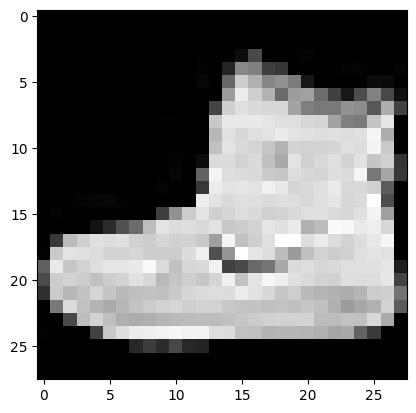

In [ ]:
# Display an image of the dataset
plt.imshow(train_images[0], cmap = 'gray')
plt.show()

In [ ]:
#Checking the label for the image [0]
print(train_labels[0])

9


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
# Normalize the pixel values to be 0 - 1
# Divide the train and test images in the maximum number that is in the image
train_images, test_images = train_images/255.0, test_images/255.0

In [ ]:
print(train_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [ ]:

# Reshape images to specify that it's a single channel (grayscale)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))


In [ ]:
train_images.shape

(60000, 28, 28, 1)

In [ ]:
test_images.shape

(10000, 28, 28, 1)

Building convolutional Neural Network

In [ ]:
# Build the convolutional base
model = models.Sequential() #calling the method Seuquential that helps to stack
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2))) #use to reduce dimensionality so the model can recognize better
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add Dense layers on top
model.add(layers.Flatten()) #flatten the array in 1D before dense layers
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10)) #Classifier layers = number of classes in our dataset
# Up to now no activation function was defined (let's go with te default one, linear)


# Compile and train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model training

In [ ]:
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))


Epoch 1/5
1875/1875 [==============================] - 13s 5ms/step - loss: 0.4892 - accuracy: 0.8218 - val_loss: 0.3638 - val_accuracy: 0.8702
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3185 - accuracy: 0.8830 - val_loss: 0.3277 - val_accuracy: 0.8777
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2696 - accuracy: 0.9008 - val_loss: 0.2973 - val_accuracy: 0.8918
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2396 - accuracy: 0.9106 - val_loss: 0.2664 - val_accuracy: 0.9027
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2177 - accuracy: 0.9196 - val_loss: 0.2667 - val_accuracy: 0.9060


Model evaluation

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.2667 - accuracy: 0.9060 - 607ms/epoch - 2ms/step

Test accuracy: 0.906000018119812


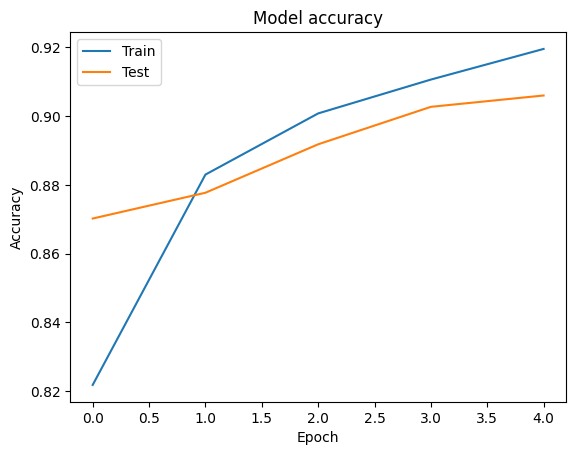

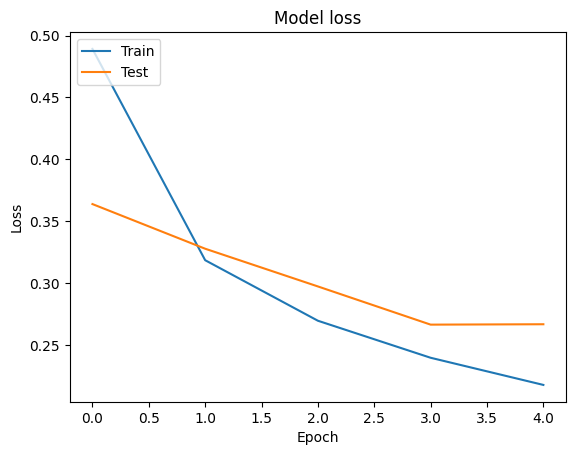

In [ ]:
# Plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
model.save('trained_fashion_mnist_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
